In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sb

experiment = '../experiment_random-average_10recs_1000trials_1init.csv'
df = pd.read_csv(experiment,sep='\t')
print(df[:5])
print(df.columns)
plt.figure(figsize=(20,10))
#sb.lmplot(data=df, x='iteration',y='bal_accuracy',hue='recommender')
sb.tsplot(data=df, time="iteration", condition="recommender", value="bal_accuracy", 
          err_style="ci_bars", estimator=np.median)
# sb.boxplot(data=df,x='iteration',y='bal_accuracy',hue='recommender')
#plt.ylim([0.5,1])
plt.savefig(experiment[:-4]+'accuracy_comparison.pdf')

   trial  iteration recommender         dataset                  ml-rec  \
0      0          0      random  car-evaluation  RandomForestClassifier   
1      0          0      random  car-evaluation      LogisticRegression   
2      0          0      random  car-evaluation                     SVC   
3      0          0      random  car-evaluation    KNeighborsClassifier   
4      0          0      random  car-evaluation  RandomForestClassifier   

                                               p-rec  bal_accuracy  
0  n_estimators=1000,min_weight_fraction_leaf=0.0...      0.974156  
1    C=15.0,penalty=l2,fit_intercept=True,dual=True,      0.831229  
2  C=0.01,gamma=0.01,kernel=poly,degree=2,coef0=5...      0.762277  
3                    n_neighbors=25,weights=distance      0.687294  
4  n_estimators=500,min_weight_fraction_leaf=0.2,...      0.500000  
Index(['trial', 'iteration', 'recommender', 'dataset', 'ml-rec', 'p-rec',
       'bal_accuracy'],
      dtype='object')


NameError: name 'sb' is not defined

algs: ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'KNeighborsClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier']
ave_count_mat (6, 149)


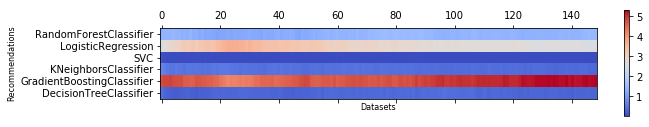

In [53]:
# generate figure of heatmap showing counts of which ML methods are recommended over time
experiment = '../experiment_random-average_10recs_1000trials_1init.csv'
df = pd.read_csv(experiment,sep='\t')
n_trials = df['trial'].max()
ave_count_mat = np.zeros((len(df['ml-rec'].unique()),len(df['iteration'].unique())))                     
rand_count_mat = np.zeros((len(df['ml-rec'].unique()),len(df['iteration'].unique())))
algs = list(df['ml-rec'].unique())
iterations = df['iteration'].unique()
print('algs:',algs)
print('ave_count_mat',ave_count_mat.shape)

dfa = df.loc[df['recommender']=='average',:]

dfa.groupby('iteration').count() #.groupby('ml-rec').count()

for index,row in dfa.iterrows():
    ave_count_mat[algs.index(row['ml-rec']),row['iteration']] += 1/n_trials
# cumulative sum
#for i,a in enumerate(ave_count_mat): 
#     ave_count_mat[i] = np.cumsum(a)
#print('ave_count_mat:',ave_count_mat)
        
h = plt.figure(figsize=(10, 15))
ax = h.gca()
tmp = ax.matshow(ave_count_mat,cmap=plt.cm.coolwarm)
# sb.heatmap(ave_count_mat)#,
           #cmap=sb.cubehelix_palette(500, light=0.95, dark=0.15),
#            square=False, annot=True, vmin=0., vmax=1.0,
#            xticklabels=iterations, yticklabels=algs, cbar=False)
cbar=plt.colorbar(tmp,ax=ax,orientation='vertical',shrink=0.1)
ax.set_yticks(np.arange(len(algs)))
ax.set_yticklabels(algs)
ax.set_xlabel('Datasets', fontsize=8)
ax.set_ylabel('Recommendations', fontsize=8)
#plt.title('ML Recommendations over many datasets', fontsize=18)
ax.set_aspect(4)
h.tight_layout()
h.savefig(experiment[:-4]+'_heatmap.pdf', bbox_inches='tight')
    